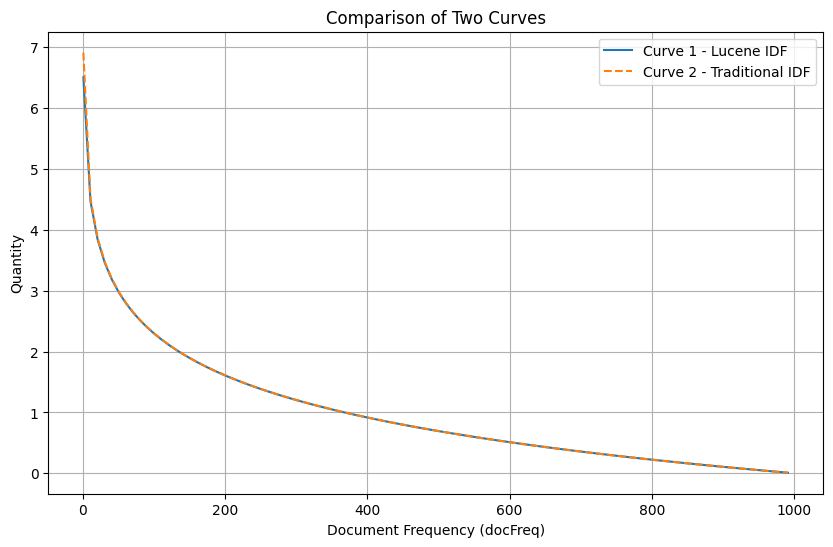

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Fixed document count
N = 1000

# we are looking at a single term t in the query
# and a single document d in the collection
# what is a cat ? => [What, is, a, cat]
# score(t,D) = tf(t,d) * idf(t)
# Generate a range of document frequencies
docFreq = np.arange(1, N, 10)

# tf_naive = docFreq
idf_bm25_lucene = np.log(1 + (N - docFreq + 0.5) / (docFreq + 0.5))
original_idf = np.log(N / docFreq) # original idf which can be negative for very common terms
# Plotting both quantities
plt.figure(figsize=(10, 6))
# plt.plot(docFreq, tf_naive, label='Curve 1 - Naive TF')
plt.plot(docFreq, idf_bm25_lucene, label='Curve 1 - Lucene IDF')
plt.plot(docFreq, original_idf, label='Curve 2 - Traditional IDF', linestyle='--')
plt.xlabel('Document Frequency (docFreq)')
plt.ylabel('Quantity')
plt.title('Comparison of Two Curves')
plt.legend()
plt.grid(True)
plt.show()

Lucene IDF $$idf(N,t) = np.log(1 + (N - dF + 0.5) / (dF  + 0.5))$$ represents the importance of a term in the search query, the terms rarest in the corpus being the ones that have a higfher weight $dF$ = Document Frequency : number of documents that contain the term; $N$ = total number of documents

The score of Query DOcument pair (Q,D) becomes $$s(Q,T)= \sum_{t \in Q} idf(t) tf(t,D) $$ where $idf$ is the relevance of a term in the query and $tf$ = term frequency is the count of $t$ in $D$ (which is the relevance of the term in the document)

$Query = Q = [q_1,...,q_n]$ $Doc = D = [t_1,...,t_L]$ $Bm25_score = \sum_{q \in Q} idf(t,Q) * tf(t,D) $ 

In [6]:
def lucene_idf(N, docFreq):
    return  np.log(1 + (N - docFreq + 0.5) / (docFreq + 0.5))

In [7]:
def idf(N, docFreq):
    # idf is a scoring function to represent the lexical weight of a term T in the query. IE how crucial is the word in the query.
    # N is the total number of documents in the collection
    # docFreq is the number of documents containing the term T
    # the only thing we need to score T is to know how many documents contain it out of how many documents in total
    # so the input to the scoring function is only the number of documents containing the term T and the total number of documents in the collection

    # How does idf scoring conserve its robustness across different dataset sizes ?
    # asymptotically the maximum idf score gains +2.3=np.log(10) for each order of magnitude of the dataset
    # which means idf scoring is robust across a large range of dataset sizes
    # dataset of size 1000 => idf scores between 0 and 6
    # dataset of size 10000 => idf scores between 0 and 8
    # dataset of size 100000 => idf scores between 0 and 10
    # etc...
    # score = sum(idf) => score = sum(log(N/docFreq)) for all terms in the query, the maximum is when only 1 
    return  np.log(N/docFreq)

# Get Data

In [8]:
import wikipedia

# List of topics
topics = ['Aluminum can', 'Drink can', 'Oil can', 'Steel and tin cans', 'Trash can', 'Petrol can', 'Can (band)', 'Can (album)', 'Can (South Korean band)']

# Dictionary to store the articles
articles = {}

# Fetching the articles
for topic in topics:
    try:
        page = wikipedia.page(topic)
        articles[topic] = page.content
    except wikipedia.exceptions.PageError:
        print(f"Page not found for {topic}")
    except wikipedia.exceptions.DisambiguationError as e:
        print(f"Ambiguous page for {topic}: {e.options}")

# Printing the articles
for topic, content in articles.items():
    print(f"Article for {topic}:")
    print(content)
    print("--------------------")

Ambiguous page for Can (South Korean band): ['Aluminum can', 'Drink can', 'Oil can', 'Steel and tin cans', 'Trash can', 'Petrol can', 'Can (band)', 'Can (album)', 'Can (South Korean band)', 'Canada', 'Cantoris', 'Can (name)', 'Can (verb)', 'Canning', 'River Can', 'Tomato can (sports idiom)', 'CAN (disambiguation)', 'Cann (disambiguation)', 'Cans (disambiguation)', 'Kan (disambiguation)']
Article for Aluminum can:
An aluminum can (British English: aluminium can) is a single-use container for packaging made primarily of aluminum.
It is commonly used for food and beverages such as olives and soup but also for products such as oil, chemicals, and other liquids. Global production is 180 billion annually and constitutes the largest single use of aluminum globally.


== Usage ==

Use of aluminum in cans began in 1957. Aluminum offers greater malleability, resulting in ease of manufacture; this gave rise to the two-piece can, where all but the top of the can is simply stamped out of a single p

/opt/anaconda3/envs/py312/lib/python3.12/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /opt/anaconda3/envs/py312/lib/python3.12/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [9]:
articles.keys()

dict_keys(['Aluminum can', 'Drink can', 'Oil can', 'Steel and tin cans', 'Trash can', 'Petrol can', 'Can (band)', 'Can (album)'])

In [10]:
corpus = [ article for article in articles.values() ]

# Term Ferquency definition

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the corpus
X = vectorizer.fit_transform(corpus)

# Get the feature names (words)
words = vectorizer.vocabulary_.keys()

# Compute the term frequencies
term_frequencies = X.toarray().sum(axis=0)

document_frequencies = (X.toarray()>0).sum(axis=0)

import pandas as pd

vocab = vectorizer.get_feature_names_out()
values = X.toarray()
# CountVectoriuzer returns
#        the document Term frequency
dtf = pd.DataFrame(values, columns=vocab)
print("Document/Term Frequency\n")
dtf

Document/Term Frequency



,000,03,04,0571311491,06,07,08704,09,10,101,...,yell,yet,york,you,young,youth,youtube,yugoslav,zappa,zealand
0,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,2,1,...,0,1,2,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,2,0,0,0,0,0,0,...,2,0,0,1,3,1,0,1,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# sanity check 
import re

word = "000"
for i in range(len(corpus)):
    matches = re.findall(r'\b' + re.escape(word) + r'\b', corpus[i], flags=re.IGNORECASE)
    print(f"{word} is present ", len(matches), f" times in the document {i} = {list(articles.keys())[i]}")


000 is present  2  times in the document 0 = Aluminum can
000 is present  2  times in the document 1 = Drink can
000 is present  0  times in the document 2 = Oil can
000 is present  0  times in the document 3 = Steel and tin cans
000 is present  0  times in the document 4 = Trash can
000 is present  0  times in the document 5 = Petrol can
000 is present  0  times in the document 6 = Can (band)
000 is present  0  times in the document 7 = Can (album)


docFreq (Document Frequency) is the number of documents in the collection that contain the term. It's not the number of times the term exists in a particular document but rather how many documents include at least one instance of the term.

In [13]:
docFrequency = (X.toarray()>0).sum(axis=0)
print(" docFrequency = ", docFrequency)

 docFrequency =  [2 1 1 ... 1 1 1]


In [14]:
idf(N, docFrequency).shape

(3122,)

In [15]:
import pandas as pd

N = X.shape[0]
idf_values = idf(N, docFrequency)
lucene_idf_values = lucene_idf(N, docFrequency)
print("IDF values = ")
idf_df = pd.DataFrame({'Word': vectorizer.get_feature_names_out(), 'IDF': idf_values, "Lucene IDF": lucene_idf_values})
idf_df

IDF values = 


,Word,IDF,Lucene IDF
0,000,1.386294,1.280934
1,03,2.079442,1.791759
2,04,2.079442,1.791759
3,0571311491,2.079442,1.791759
4,06,2.079442,1.791759
...,...,...,...
3117,youth,2.079442,1.791759
3118,youtube,2.079442,1.791759
3119,yugoslav,2.079442,1.791759
3120,zappa,2.079442,1.791759


In [16]:
# Now let's try Tf-Idf scoring
from sklearn.feature_extraction.text import TfidfVectorizer
# Tf-idf scores
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False, sublinear_tf=False)
X = vectorizer.fit_transform(corpus)
vocab = vectorizer.get_feature_names_out()
values = X.toarray()
tfidf_scores = pd.DataFrame(values, columns=vocab)
tfidf_scores

# this represents the trained "index" that we will lookup to do a search 

,000,03,04,0571311491,06,07,08704,09,10,101,...,yell,yet,york,you,young,youth,youtube,yugoslav,zappa,zealand
0,0.036400,0.000000,0.000000,0.000000,0.000000,0.000000,0.018200,0.00000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.009744,0.000000,0.000000,0.000000,0.012575,0.012575,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.012575
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.012939,0.00647,...,0.000000,0.00647,0.012939,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.022465,0.022465,0.000000,0.000000,0.000000,0.000000,0.04493,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033801,0.00000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000,0.043619,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.016533,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.016533,0.00000,0.000000,0.008267,0.0248,0.008267,0.000000,0.008267,0.008267,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
# Tf IDF ranking is a scoring function that combines the term frequency and the inverse document frequency
# the term frequency is the number of times a term appears in a document
# the inverse document frequency is the number of documents containing the term in the collection
# the tf-idf score is the product of these two quantities
# the tf-idf score is a measure of the importance of a term in a document relative to the collection
# the higher the tf-idf score the more important the term is in the document
def query_on_index(query, index):
    # index is a matrix of document x term scores
    # We only need to sum the columns of the query words\
    
    query_words = query.split()
    query_words = list(map(lambda x: x.lower(), query_words))
    tfidf_scores = np.zeros(X.shape[0])
    for query_word in query_words:
        tfidf_scores += index[query_word]
    sorted_documents = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)
    return sorted_documents

query = "aluminum can packaging"

tf_idf_ranking = query_on_index(query, tfidf_scores)
print("TFIDF Ranking of documents for the query: ", query)
for document, score in tf_idf_ranking:
    print(f"Document {document} {list(articles.keys())[document]} : Score {score}")

TFIDF Ranking of documents for the query:  aluminum can packaging
Document 0 Aluminum can : Score 0.597139691057806
Document 1 Drink can : Score 0.2931161215402621
Document 7 Can (album) : Score 0.2834166391080003
Document 2 Oil can : Score 0.25186680054327726
Document 3 Steel and tin cans : Score 0.2036042104959227
Document 6 Can (band) : Score 0.19059640758223118
Document 5 Petrol can : Score 0.08064022587783953
Document 4 Trash can : Score 0.072950947672723


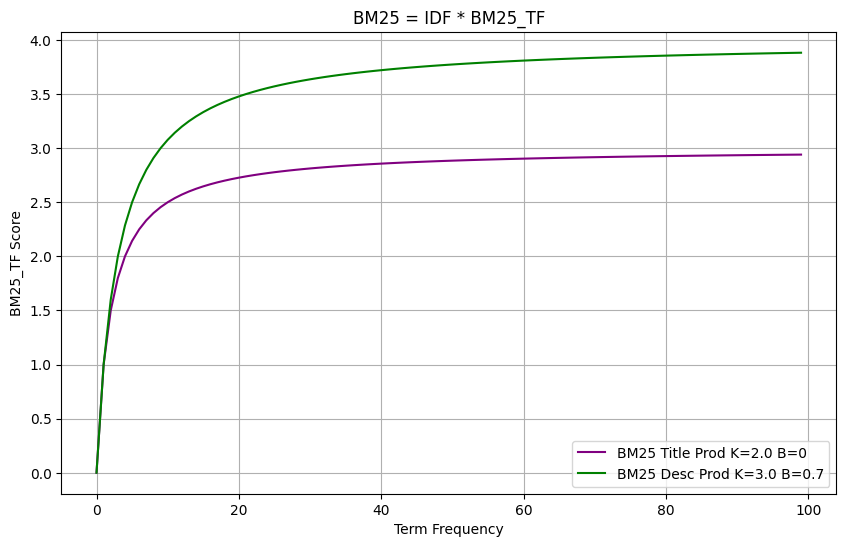

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# What does bm25title versus bm25description look like ?
# BM25 Term Frequency (TF) component calculation
def bm25_tf(freq, k=1.2, b=0.8, avg_doc_length=300, doc_length=300):
    """
    Calculate the term frequency component of the BM25 formula.
    
    Parameters:
    - freq: term frequency in the document
    - k: controls non-linear term frequency normalization (saturation)
    - b: controls to what degree document length normalizes tf values
    - avg_doc_length: average document length in the text collection
    - doc_length: length of the document
    
    Returns:
    - The term frequency component of the BM25 score for the term
    """
    return 0 if freq==0 else (freq * (k + 1)) / (freq + k * (1 - b + b * (doc_length / avg_doc_length)))
    freq/freq 

# Generate a range of term frequencies
term_frequencies = np.arange(0, 100, 1)

# Calculate BM25 TF component for each term frequency
tf_components = [bm25_tf(freq) for freq in term_frequencies]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(term_frequencies, [bm25_tf(freq,k=2.0,b=0) for freq in term_frequencies], label='BM25 Title Prod K=2.0 B=0', color='purple')
plt.plot(term_frequencies, [bm25_tf(freq,k=3.0,b=0.7) for freq in term_frequencies], label='BM25 Desc Prod K=3.0 B=0.7', color='green')
# plt.plot(term_frequencies, [bm25_tf(freq,k=1.4,b=0.65) for freq in term_frequencies], label='BM25 Title K=1.4.B=0.65', color='blue')
# plt.plot(term_frequencies, [bm25_tf(freq,k=0,b=0) for freq in term_frequencies], label='BM25 Description K=0.B=0', color='red')

plt.title('BM25 = IDF * BM25_TF')
plt.xlabel('Term Frequency')
plt.ylabel('BM25_TF Score')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
bm25_tf(2,k=3,b=0.7)

1.6

In [20]:
bm25_tf(2,k=2,b=0)

1.5

In [21]:
bm25_tf(1,k=1.4,b=0.65)

1.0

In [22]:
bm25_tf(2,k=1.4,b=0.65)

1.411764705882353

In [23]:
bm25_tf(3,k=1.4,b=0.65)

1.636363636363636

In [24]:
bm25_tf(4,k=1.4,b=0.65)

1.7777777777777777

In [25]:
bm25_tf(0,k=0,b=0)

0

In [26]:
bm25_tf(2,k=0,b=0)

1.0

In [27]:
bm25_tf(2,k=3,b=0)

1.6